In [230]:
import pandas as pd
import numpy as np
import math
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
dataset = load_iris()

In [231]:
type(dataset.data)

numpy.ndarray

In [239]:
df = pd.DataFrame(dataset.data)
df['target'] = dataset.target
df = df[df['target'] != 2]
X = df.drop('target', axis = 1)
y = df['target']
scaler = StandardScaler()
X_numpy = scaler.fit_transform(X)
y_numpy = y.to_numpy()
X_numpy = np.hstack([X_numpy, np.ones((X_numpy.shape[0], 1))])
w = np.zeros((X_numpy.shape[1]))

In [249]:
def training(X_numpy, y_numpy, w, iters, alfa):
    costs = []
    for itr in range(iters):
        y_pred = sigmoid(comp_z(X_numpy, w)).flatten()
        eps = 1e-15
        y_pred = np.clip(y_pred, eps, 1 - eps)
        cost = -np.mean(y_numpy * np.log(y_pred) + (1 - y_numpy) * np.log(1 - y_pred))
        grad_vector = np.dot(X_numpy.T, y_pred - y_numpy) / X_numpy.shape[0]
        w = w - alfa * grad_vector
        if (itr % 100 == 0):
            costs.append(cost)
            print("cost", cost)
    return w, costs

In [235]:
def comp_z(X_numpy, w):
    return np.dot(X_numpy, w)

In [236]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [250]:
new_w, costs = training(X_numpy, y_numpy, w, 10000, 0.001)

cost 0.6931471805599453
cost 0.6265389570573671
cost 0.5692572721137846
cost 0.519873809049904
cost 0.47714584168634394
cost 0.4400153464703331
cost 0.4075941480341432
cost 0.3791429547120705
cost 0.3540491139116083
cost 0.33180567396585103
cost 0.31199289796133806
cost 0.29426254554080833
cost 0.2783248115080718
cost 0.26393762261027004
cost 0.25089793778947467
cost 0.23903470671756388
cost 0.2282031793525193
cost 0.21828030588601
cost 0.20916101217982563
cost 0.20075517650935723
cost 0.19298516788950903
cost 0.1857838345608154
cost 0.1790928540443728
cost 0.17286137438963864
cost 0.16704489067850348
cost 0.16160431225585192
cost 0.1565051851560117
cost 0.15171704129523628
cost 0.14721285160990427
cost 0.14296856476027356
cost 0.13896271654296627
cost 0.13517609795926977
cost 0.13159147212474984
cost 0.1281933319986276
cost 0.12496769235248047
cost 0.12190191056022877
cost 0.11898453173230862
cost 0.11620515448131646
cost 0.11355431422957073
cost 0.1110233814788525
cost 0.108604472881

In [241]:
y_pred = sigmoid(comp_z(X_numpy, new_w))
y_pred = (y_pred > 0.5).astype(int)

In [246]:
np.mean(y_numpy == y_pred) * 100

100.0

In [247]:
new_w

array([ 0.72352132, -0.85381774,  1.12008978,  1.11634974,  0.03487379])

Text(0, 0.5, 'cost')

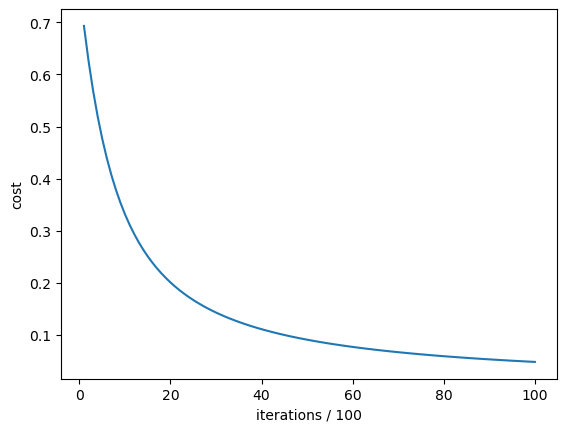

In [253]:
plt.plot(np.arange(1, 101), costs)
plt.xlabel('iterations / 100')
plt.ylabel('cost')